# Base Model (ARIMA)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import time

In [5]:
# read the data
file = "./dataset.csv"
df = pd.read_csv(file, index_col='Date', parse_dates=True)
df

,AUD,EUR,NZD,GBP,BRL,CAD,CNY,DKK,HKD,INR,...,CHF,TWD,THB,VEB,gdpGBP,gdpUSD,GBR_Value,USA_Value,liborUSD,liborGBP
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,0.631500,0.973100,0.490400,1.615000,1.795000,1.446800,8.277400,7.644500,7.780700,43.620000,...,1.654000,31.750000,37.510000,6.563000e-01,100.90500,101.5818,NaN,NaN,5.84138,5.97114
2000-03-01,0.606700,0.970000,0.485300,1.584900,1.769000,1.447000,8.278600,7.673000,7.782400,43.630000,...,1.656800,30.750000,38.110000,6.630000e-01,100.93520,101.6581,NaN,NaN,5.96000,5.88913
2000-05-01,0.580000,0.912000,0.483500,1.555800,1.807000,1.478300,8.279900,8.169500,7.789000,43.670000,...,1.713500,30.650000,38.120000,6.758000e-01,100.91940,101.7747,NaN,NaN,6.43857,5.99906
2000-06-01,0.572100,0.930700,0.456100,1.491500,1.821000,1.491000,8.277100,8.022500,7.792000,44.650000,...,1.687800,30.900000,39.190000,6.818000e-01,100.88750,101.7674,NaN,NaN,6.66582,5.99415
2000-08-01,0.580500,0.922800,0.454600,1.499200,1.786000,1.489200,8.278800,8.084000,7.799300,45.150000,...,1.675800,31.150000,41.090000,6.880000e-01,100.81010,101.6210,NaN,NaN,6.57688,5.94362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,1.522934,0.920376,1.630278,0.785825,4.919647,1.338190,7.156337,6.860283,7.819398,82.963015,...,0.857789,31.293190,35.328375,3.615638e+06,99.75476,100.4912,-2.506553,-2.901892,5.43596,5.32646
2024-03-01,1.531798,0.923196,1.638305,0.790470,4.948222,1.355491,7.195813,6.881556,7.829028,82.858687,...,0.884360,31.599983,35.869689,3.607648e+06,99.75476,100.4912,-2.506553,-2.901892,5.43989,5.31892
2024-04-01,1.542390,0.931698,1.682959,0.797231,5.066569,1.358095,7.230758,6.949495,7.826226,83.534071,...,0.905549,32.078999,36.605359,3.622553e+06,99.75476,100.4912,-2.506553,-2.901892,5.43280,-


In [6]:
# extract the univariate series
variable_to_predict = df['GBP']
variable_to_predict

Date
2000-02-01    1.615000
2000-03-01    1.584900
2000-05-01    1.555800
2000-06-01    1.491500
2000-08-01    1.499200
                ...   
2024-02-01    0.785825
2024-03-01    0.790470
2024-04-01    0.797231
2024-05-01    0.800790
2024-06-01    0.784984
Name: GBP, Length: 203, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

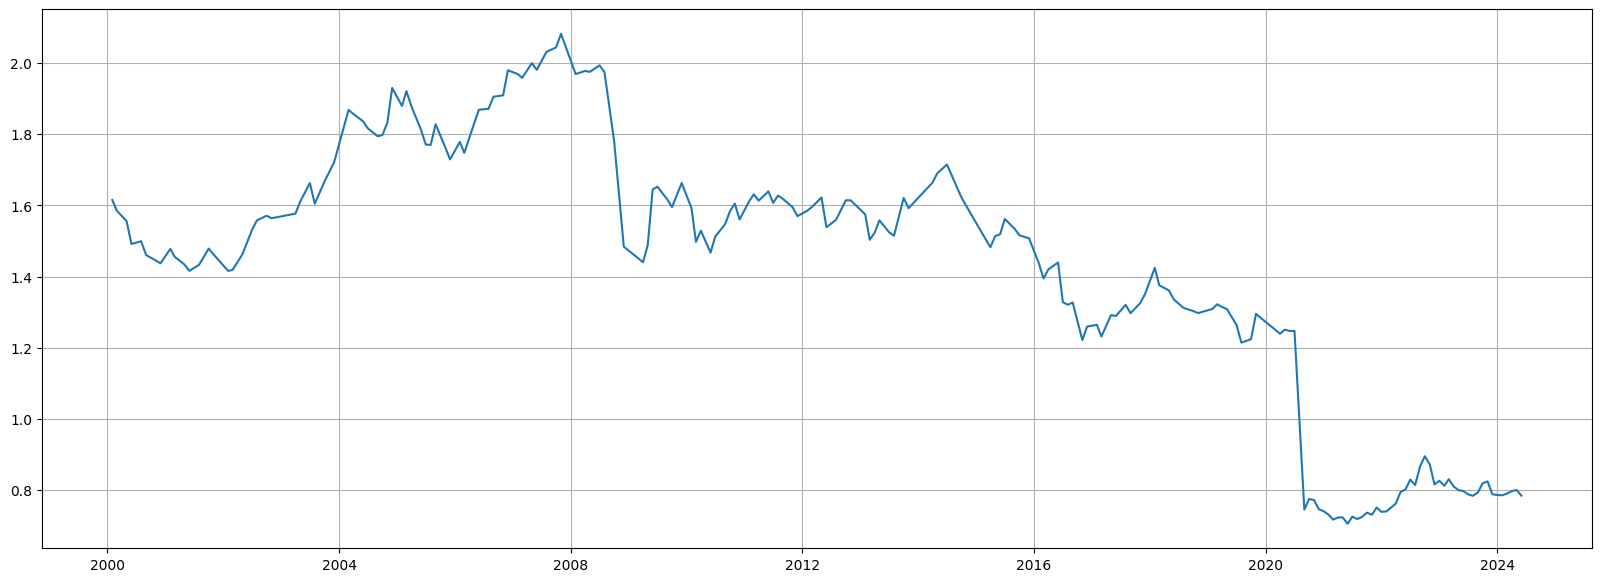

In [7]:
# plot the series
plt.figure(figsize=(20,7))
plt.plot(variable_to_predict)
plt.grid(True)
plt.show

In [8]:
# Augmented Dickey-Fuller test for staionarity
result = adfuller(variable_to_predict)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# the series is not stationary

ADF Statistic: -0.583285
p-value: 0.874714
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


ADF statistics is bigger than critical values (-1.185785 > 1%: -3.432,	5%: -2.862, 10%: -2.567), meaning that we cannot reject the null-hypothesis stating that there is the presence of unit root. So our time-series is *un*stationary. We should make it stationary first.

In [9]:
# get the differences of the observations for stationarity
variable_to_predict_diff1 = variable_to_predict.diff()
variable_to_predict_diff1 # first row should be dropped due to the NaN value

Date
2000-02-01         NaN
2000-03-01   -0.030100
2000-05-01   -0.029100
2000-06-01   -0.064300
2000-08-01    0.007700
                ...   
2024-02-01   -0.000880
2024-03-01    0.004645
2024-04-01    0.006761
2024-05-01    0.003559
2024-06-01   -0.015806
Name: GBP, Length: 203, dtype: float64

In [10]:
# drop the NaN row
variable_to_predict_diff1.dropna(inplace=True)
variable_to_predict_diff1 # now the series one less --> 4919

Date
2000-03-01   -0.030100
2000-05-01   -0.029100
2000-06-01   -0.064300
2000-08-01    0.007700
2000-09-01   -0.038700
                ...   
2024-02-01   -0.000880
2024-03-01    0.004645
2024-04-01    0.006761
2024-05-01    0.003559
2024-06-01   -0.015806
Name: GBP, Length: 202, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

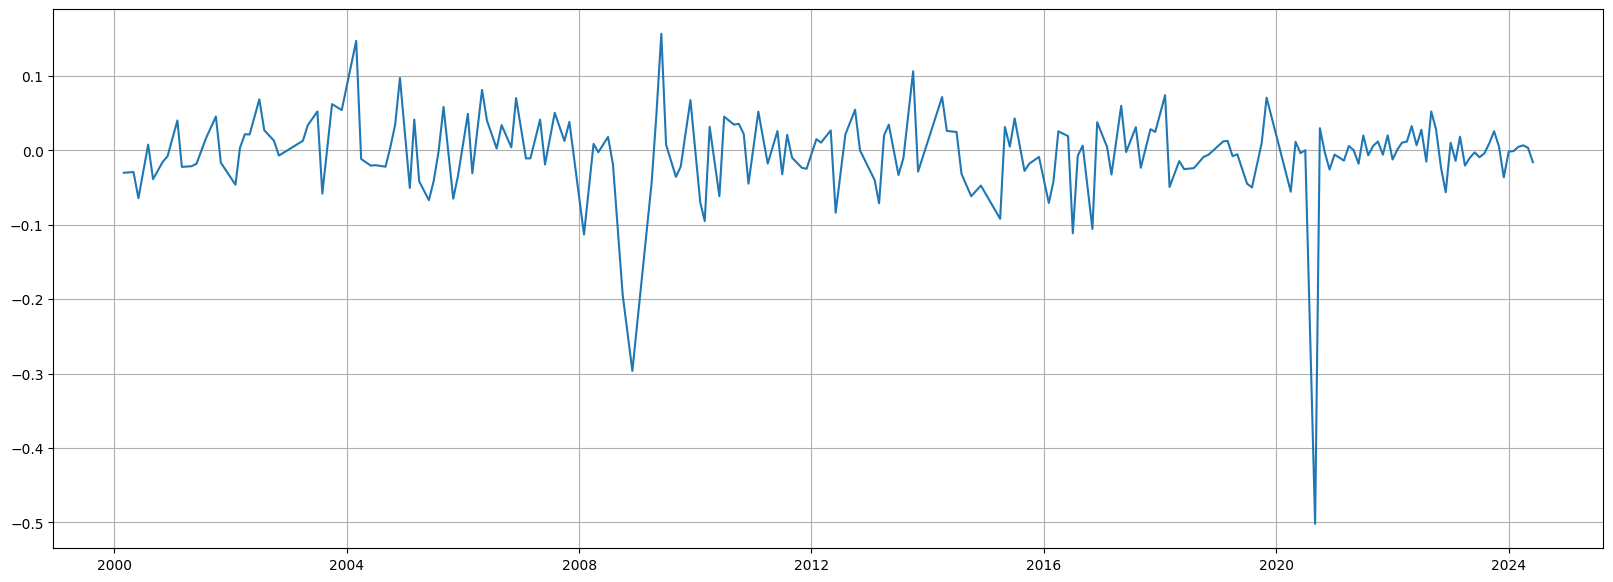

In [11]:
# plot the series again to observe stationarity
plt.figure(figsize=(20,7))
plt.grid(True)
plt.plot(variable_to_predict_diff1)
plt.show

In [12]:
# This is the day after Brexit referendum
variable_to_predict_diff1.idxmin()

Timestamp('2020-09-01 00:00:00')

In [13]:
# we can see the sudden shock on the exchange rate here
variable_to_predict_diff1['22/6/2016':'28/6/2016'], variable_to_predict['22/6/2016':'28/6/2016']

(Series([], Name: GBP, dtype: float64), Series([], Name: GBP, dtype: float64))

In [14]:
# check again to see if the series get stationary
result = adfuller(variable_to_predict_diff1, regression='ctt')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.157528
p-value: 0.000000
Critical Values:
	1%: -4.430
	5%: -3.862
	10%: -3.572


This time our series got stationary in every confidence level (smaller than all critical values and/or p-value suggest the rejection of the null-hypothesis)

(-0.05, 0.05)

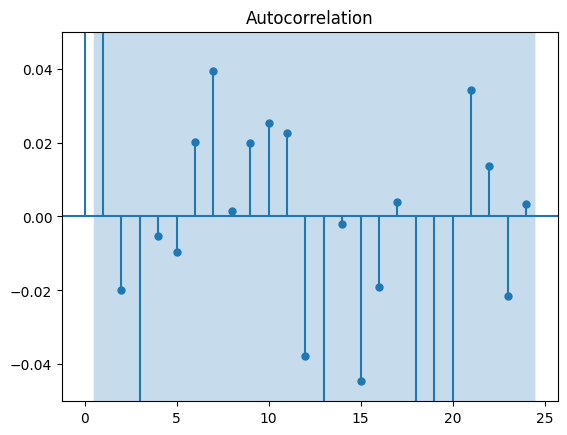

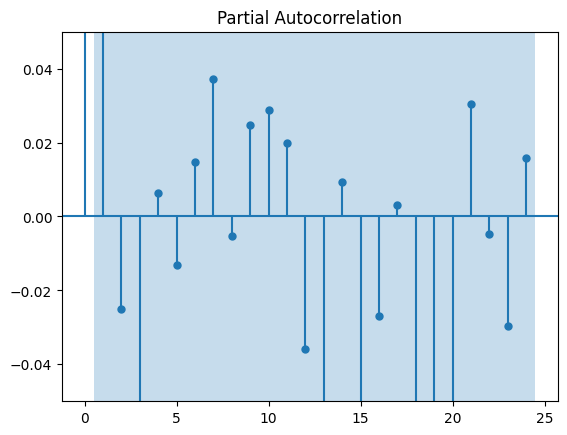

In [15]:
# plot the autocorrelation and partial autocorrelation
# this tells us about the AR(q) and MA(p) values
acf = plot_acf(variable_to_predict_diff1)
plt.ylim(-0.05,0.05)
pacf = plot_pacf(variable_to_predict_diff1)
plt.ylim(-0.05,0.05)

ARIMA(p,d,q)
tests suggests ARIMA(1,1,1)
both of the plots shows that the correlation dies away after the first reading.

In [16]:
# Model the ARIMA process
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(variable_to_predict[:-50], order=(1,1,1), trend='n')
result = model.fit()
result.summary()

/Users/tranphuctho276/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tranphuctho276/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tranphuctho276/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GBP   No. Observations:                  153
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 230.649
Date:                Sat, 06 Jul 2024   AIC                           -455.298
Time:                        15:47:00   BIC                           -446.226
Sample:                             0   HQIC                          -451.613
                                - 153                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0348      0.573      0.061      0.952      -1.088       1.157
ma.L1          0.1384      0.570      0.243      0.808      -0.978       1.255
sigma2         0.0028      0.000      9.995      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               118.75
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.87
Prob(H) (two-sided):                  0.98   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

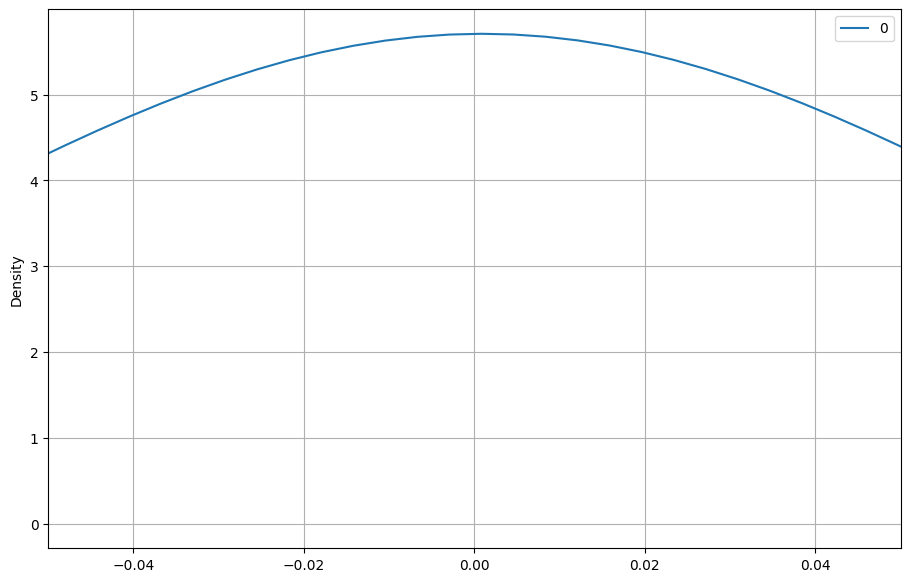

In [17]:
# the residual distribution is very close to normal distribution
residuals = pd.DataFrame(result.resid)
residuals.plot(kind='kde', figsize=(11,7))
plt.xlim(-0.05,0.05)
plt.grid(True)
plt.show()

/var/folders/qk/ct1q8p117253m_wtrxf4d__00000gn/T/ipykernel_27049/1945771506.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


 predicted=1.306881, expected=1.239400 
 predicted=1.228746, expected=1.250900 
 predicted=1.254150, expected=1.247200 
 predicted=1.246183, expected=1.247400 
 predicted=1.247567, expected=0.745558 
 predicted=0.666797, expected=0.775389 
 predicted=0.781490, expected=0.772529 
 predicted=0.771934, expected=0.746784 
 predicted=0.744862, expected=0.741076 
 predicted=0.740804, expected=0.731267 
 predicted=0.730532, expected=0.717484 
 predicted=0.716478, expected=0.723362 
 predicted=0.723905, expected=0.723707 
 predicted=0.723686, expected=0.705802 
 predicted=0.704416, expected=0.725783 
 predicted=0.727344, expected=0.719111 
 predicted=0.718455, expected=0.725149 
 predicted=0.725668, expected=0.737063 
 predicted=0.737930, expected=0.731188 
 predicted=0.730661, expected=0.751458 
 predicted=0.753052, expected=0.739203 
 predicted=0.738135, expected=0.740537 
 predicted=0.740730, expected=0.750868 
 predicted=0.751636, expected=0.762687 
 predicted=0.763521, expected=0.795184 


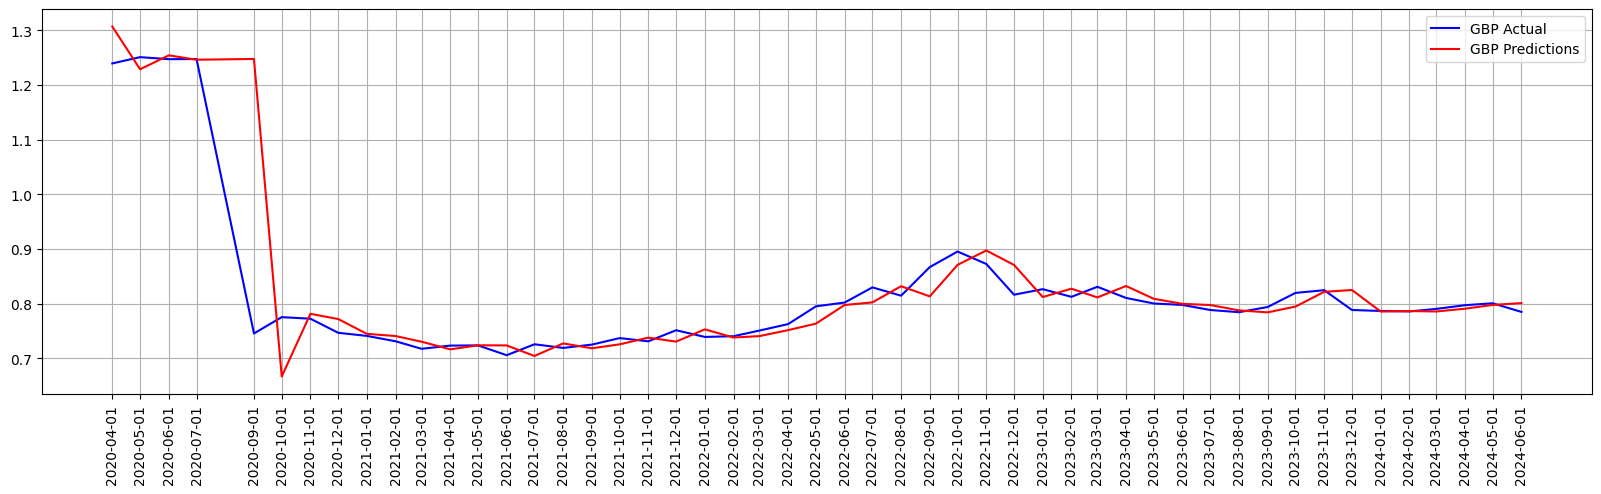

Test RMSE: 0.07547
Total time: 0.9631218910217285 seconds


In [18]:
# evaluate an ARIMA model using a walk-forward validation
start = time.time()

X = variable_to_predict
size = len(X[:-50]) # Only the last 50 elements will be used for test
train, test = X[:size], X[size:]
history = [x for x in train]
predictions = list()
len(test)

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1), trend='n')
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print( ' predicted=%f, expected=%f ' % (yhat, obs))

# evaluate forecasts
plt.figure(figsize=(20,5))
plt.plot(test.index, test, color='blue')
plt.plot(test.index, predictions, color='red')
plt.legend(('GBP Actual', 'GBP Predictions'))
plt.xticks(test.index, rotation=90)
plt.grid(True)
plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.5f' % rmse)

end = time.time()
print("Total time:", end-start, "seconds")